<a href="https://colab.research.google.com/github/Mudassir4545/FlaskWebsite/blob/main/Anomly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [15]:
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.8/377.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.3.1 which is incompatible.


In [16]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [17]:
#seed(10)
#tf.set_random_seed(10)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
path = "/content/drive/MyDrive"

In [20]:
all_data = pd.read_csv(path+"/data.csv")
all_data.head()

,Angle,Torque
0,72,2531
1,72,2531
2,72,2531
3,72,2531
4,72,2531


In [21]:
all_data.tail()

,Angle,Torque
995,90,2513
996,90,2513
997,90,2513
998,90,2514
999,90,2514


Box plot visualization:


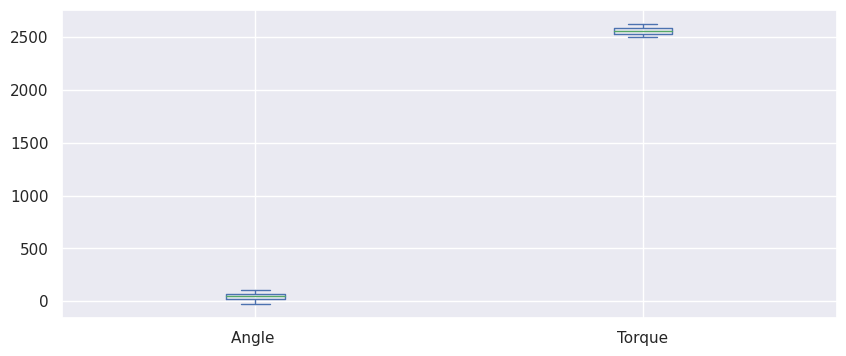

In [22]:
print('Box plot visualization:')
tn , fp , fn , tp = 90 , 30, 50, 350
all_data.plot(kind='box', figsize = (10,4))
plt.show()

In [23]:
train = all_data[ : 500]
test = all_data[500: ]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (500, 2)
Test dataset shape: (500, 2)


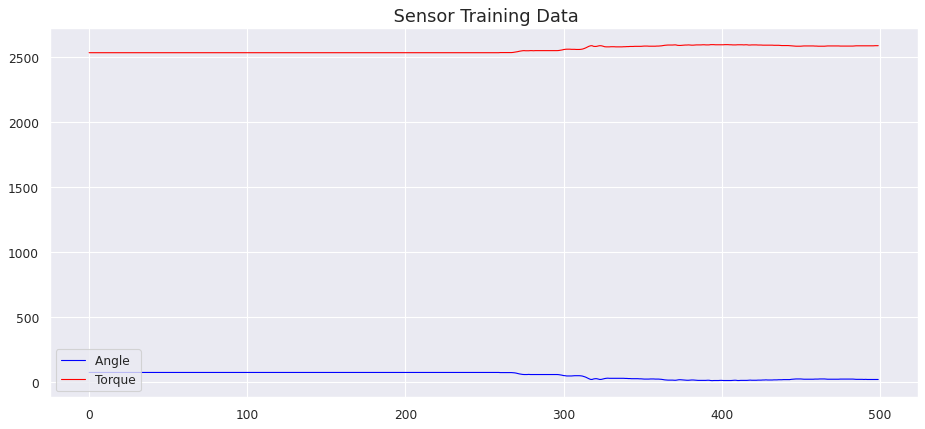

In [24]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['Angle '], label='Angle ', color='blue', animated = True, linewidth=1)
ax.plot(train['Torque'], label='Torque', color='red', animated = True, linewidth=1)

plt.legend(loc='lower left')
ax.set_title(' Sensor Training Data', fontsize=16)
plt.show()

In [25]:
# transforming data from the time domain to the frequency domain using fast Fourier transform
train_fft = np.fft.fft(train)
test_fft = np.fft.fft(test)

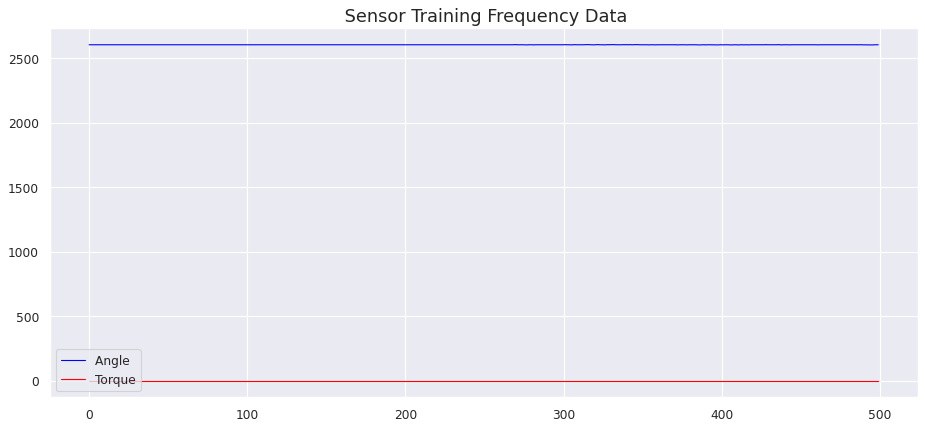

In [26]:
# frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='Angle ', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].imag, label='Torque', color='red', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title(' Sensor Training Frequency Data', fontsize=16)
plt.show()

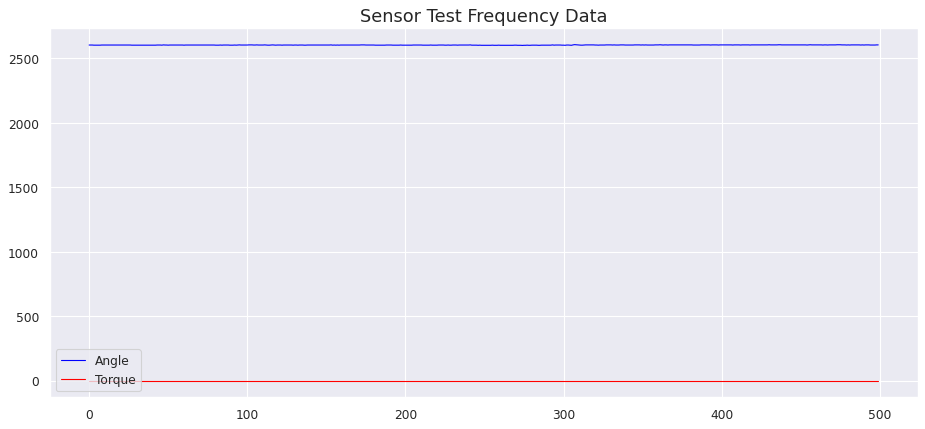

In [27]:
# frequencies of the degrading sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='Angle', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='Torque', color='red', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Sensor Test Frequency Data', fontsize=16)
plt.show()

In [28]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
y_train = scaler.fit_transform(train)
y_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)


['scaler_data']

In [29]:
print(X_test)

[[ 0.14285714  0.87096774]
 [ 0.14285714  0.87096774]
 [ 0.14285714  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.88709677]
 [ 0.12698413  0.88709677]
 [ 0.12698413  0.88709677]
 [ 0.12698413  0.88709677]
 [ 0.12698413  0.88709677]
 [ 0.12698413  0.88709677]
 [ 0.12698413  0.88709677]
 [ 0.11111111  0.90322581]
 [ 0.12698413  0.88709677]
 [ 0.11111111  0.90322581]
 [ 0.11111111  0.90322581]
 [ 0.11111111  0.90322581]
 [ 0.11111111  0.90322581]
 [ 0.11111111  0.90322581]
 [ 0.11111111  0.90322581]
 [ 0.11111111  0.90322581]
 [ 0.11111111  0.90322581]
 [ 0.11111111  0.90322581]
 [ 0.12698413  0.88709677]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 [ 0.12698413  0.87096774]
 

In [30]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
y_train = X_train.reshape(y_train.shape[0], 1, y_train.shape[1])
print("Training data shape:", y_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)
y_test = y_test.reshape(y_test.shape[0], 1, y_test.shape[1])
print("Test data shape:", y_test.shape)

Training data shape: (500, 1, 2)
Training data shape: (500, 1, 2)
Test data shape: (500, 1, 2)
Test data shape: (500, 1, 2)


In [31]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model


In [32]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 2)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1216      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

In [33]:
 #fit the model to the data
nb_epochs = 300
batch_size = 10
history = model.fit(X_train, y_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/300
48/48 [==============================] - 6s 14ms/step - loss: 0.4873 - val_loss: 0.4693
Epoch 2/300
48/48 [==============================] - 0s 4ms/step - loss: 0.4585 - val_loss: 0.4306
Epoch 3/300
48/48 [==============================] - 0s 4ms/step - loss: 0.4301 - val_loss: 0.4578
Epoch 4/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3805 - val_loss: 0.5294
Epoch 5/300
48/48 [==============================] - 0s 4ms/step - loss: 0.2221 - val_loss: 0.5082
Epoch 6/300
48/48 [==============================] - 0s 4ms/step - loss: 0.1938 - val_loss: 0.4632
Epoch 7/300
48/48 [==============================] - 0s 4ms/step - loss: 0.1792 - val_loss: 0.4204
Epoch 8/300
48/48 [==============================] - 0s 5ms/step - loss: 0.1680 - val_loss: 0.3869
Epoch 9/300
48/48 [==============================] - 0s 7ms/step - loss: 0.1578 - val_loss: 0.3611
Epoch 10/300
48/48 [==============================] - 0s 7ms/step - loss: 0.1506 - val_loss: 0.3443
Epoch 11

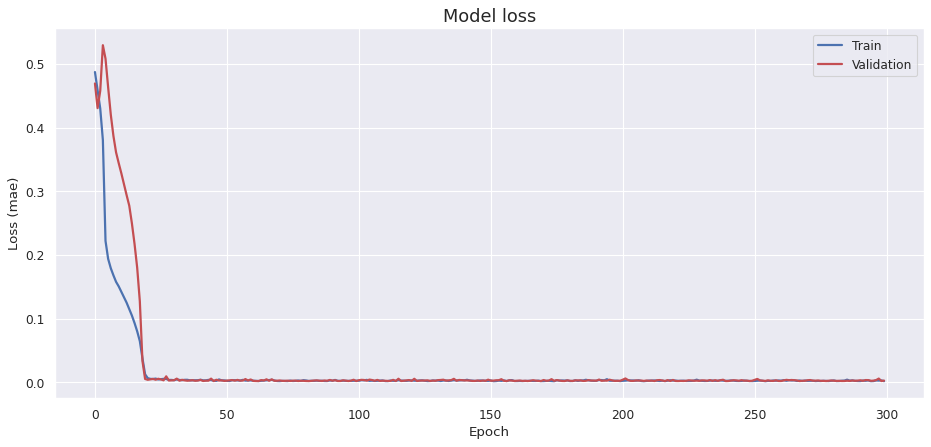

In [34]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

16/16 [==============================] - 1s 2ms/step


<ipython-input-35-43c526603ba6>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');


(-0.02, 0.025)

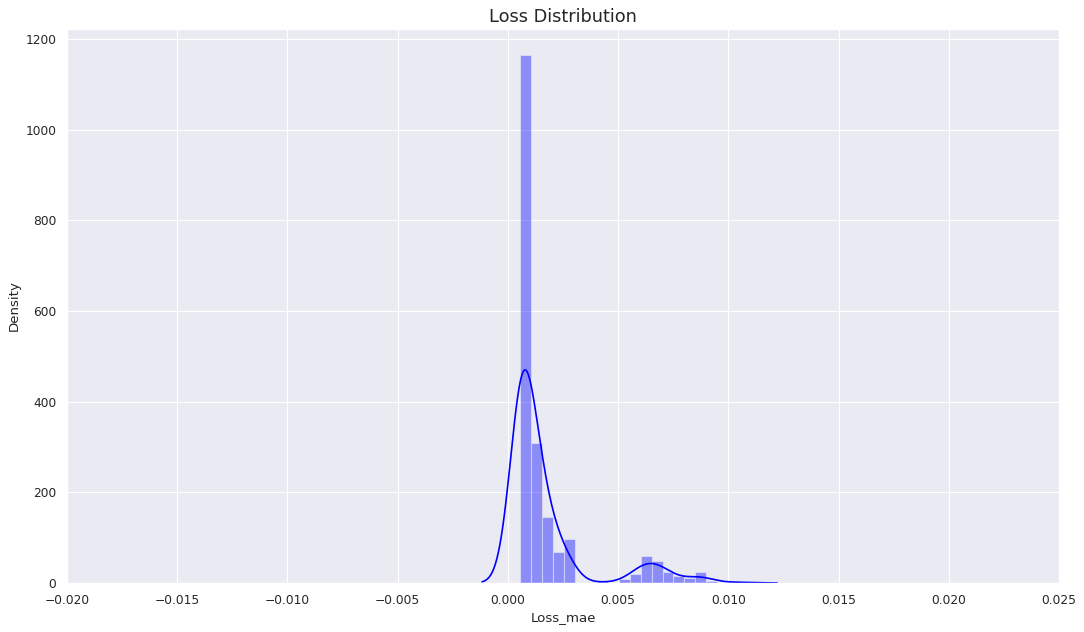

In [35]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([-0.02,0.025])

In [36]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.012
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head(1000)

16/16 [==============================] - 0s 2ms/step


,Loss_mae,Threshold,Anomaly
500,0.001432,0.012,False
501,0.001432,0.012,False
502,0.001432,0.012,False
503,0.006677,0.012,False
504,0.006677,0.012,False
...,...,...,...
995,0.072970,0.012,True
996,0.072970,0.012,True
997,0.072970,0.012,True
998,0.061259,0.012,True


In [37]:
# calculate the same metrics for the training set 
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.025
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

16/16 [==============================] - 0s 2ms/step


In [38]:
print(scored)

     Loss_mae  Threshold  Anomaly
0    0.000647      0.025    False
1    0.000647      0.025    False
2    0.000647      0.025    False
3    0.000647      0.025    False
4    0.000647      0.025    False
..        ...        ...      ...
995  0.072970      0.012     True
996  0.072970      0.012     True
997  0.072970      0.012     True
998  0.061259      0.012     True
999  0.061259      0.012     True

[1000 rows x 3 columns]


<Axes: >

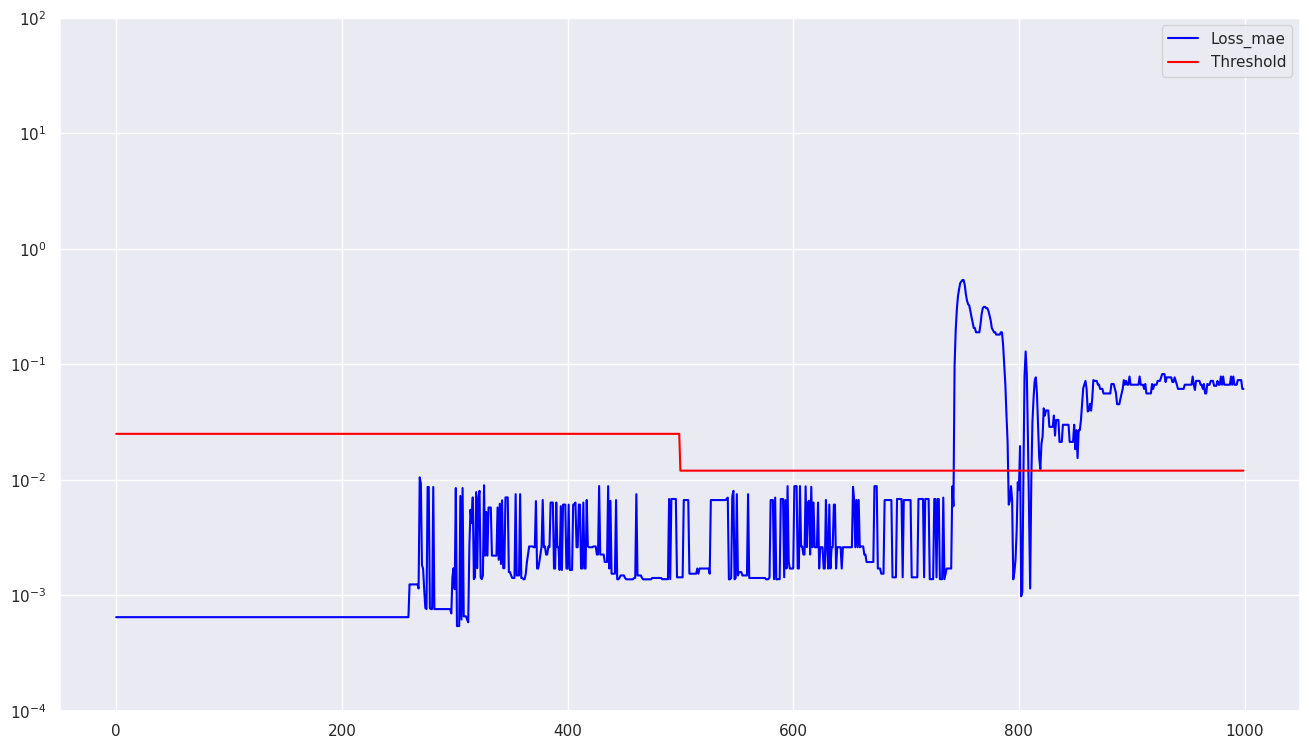

In [39]:
# plot Anomly Detection time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-4,1e2], color=['blue','red'])

In [40]:
test.shape
print(test)

     Angle   Torque
500      18    2585
501      18    2585
502      18    2585
503      17    2585
504      17    2585
..      ...     ...
995      90    2513
996      90    2513
997      90    2513
998      90    2514
999      90    2514

[500 rows x 2 columns]


In [41]:
X_pred.shape



(500, 2)

In [42]:
test['Angle '] = test['Angle ']/test["Angle "].max()
test['Torque'] = test['Torque']/test["Torque"].max()
test.head()

<ipython-input-42-b5bb803d0979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Angle '] = test['Angle ']/test["Angle "].max()
<ipython-input-42-b5bb803d0979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Torque'] = test['Torque']/test["Torque"].max()


,Angle,Torque
500,0.174757,0.984762
501,0.174757,0.984762
502,0.174757,0.984762
503,0.165049,0.984762
504,0.165049,0.984762
